<a href="https://colab.research.google.com/github/kamojaz/mma/blob/main/MMA_831_DOS_Assignment_Final_Team_Stirling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.6 MB/

# Load Packages and Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('MMM_Blender_data_2.xlsx', )
df.head()

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
0,Jan-2008,6237000,181222.548442,12152.540107,24986.912760,135.0
1,Feb-2008,6115500,179104.353164,57353.376363,17574.385360,135.0
2,Mar-2008,10577250,222756.223235,146794.245435,16016.022899,135.0
3,Apr-2008,13473000,188266.818315,376459.468169,29689.694160,135.0
4,May-2008,6258525,210038.289741,21297.573231,17606.991440,136.5


# Data Exploration

In [ ]:
df.dtypes

Date               object
Sales ($)           int64
TV_ads ($)        float64
online_ads ($)    float64
Print_ads ($)     float64
Price ($)         float64
dtype: object

In [ ]:
df.corr(numeric_only=True)

,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
Sales ($),1.000000,0.257099,0.835495,0.175270,-0.445525
TV_ads ($),0.257099,1.000000,0.024491,-0.051552,-0.099772
online_ads ($),0.835495,0.024491,1.000000,0.002512,-0.057553
Print_ads ($),0.175270,-0.051552,0.002512,1.000000,-0.073863
Price ($),-0.445525,-0.099772,-0.057553,-0.073863,1.000000


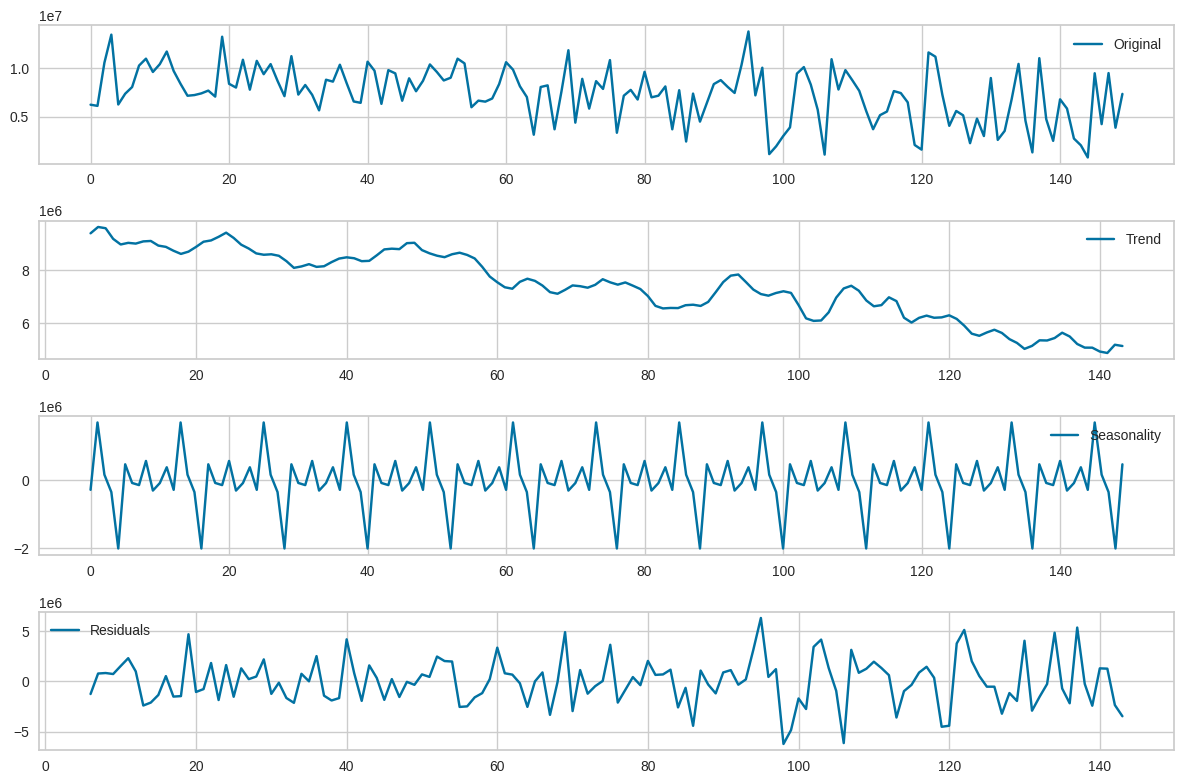

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have a DataFrame with a 'Date' column and a numeric column, e.g., 'Sales ($)'
# Extract the numeric column you want to analyze
numeric_column = 'Sales ($)'
time_series_data = df[numeric_column]

# Convert the time series data to a Pandas Series or Numpy array
time_series_series = time_series_data.values

# Specify the seasonal period based on the expected seasonality (e.g., 12 for monthly data)
period = 12

# Perform seasonal decomposition
result = seasonal_decompose(time_series_series, model='additive', period=period)

# Extract the individual components
level = result.trend
seasonality = result.seasonal
residual = result.resid

# Plot the decomposition components
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(411)  # 4 rows, 1 column, plot 1
plt.plot(time_series_series, label='Original')
plt.legend()

plt.subplot(412)  # 4 rows, 1 column, plot 2
plt.plot(level, label='Trend')
plt.legend()

plt.subplot(413)  # 4 rows, 1 column, plot 3
plt.plot(seasonality, label='Seasonality')
plt.legend()

plt.subplot(414)  # 4 rows, 1 column, plot 4
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
df['Sales ($)'].autocorr()

0.24698471482168666

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

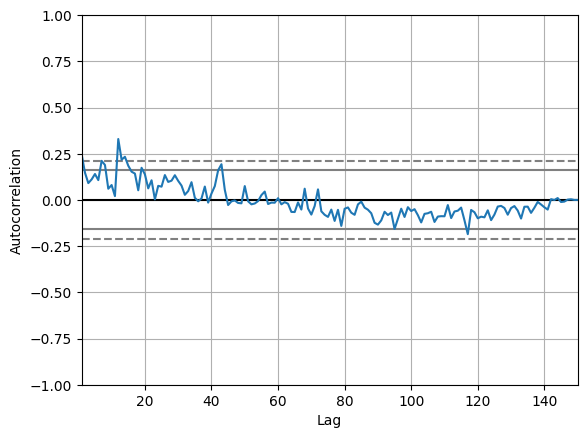

In [ ]:
pd.plotting.autocorrelation_plot(df['Sales ($)'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

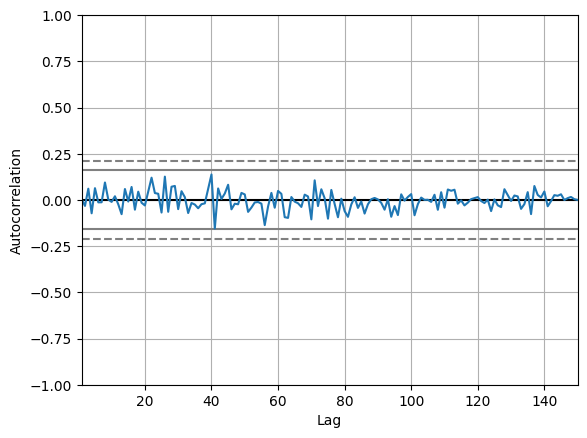

In [ ]:
pd.plotting.autocorrelation_plot(df['TV_ads ($)'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

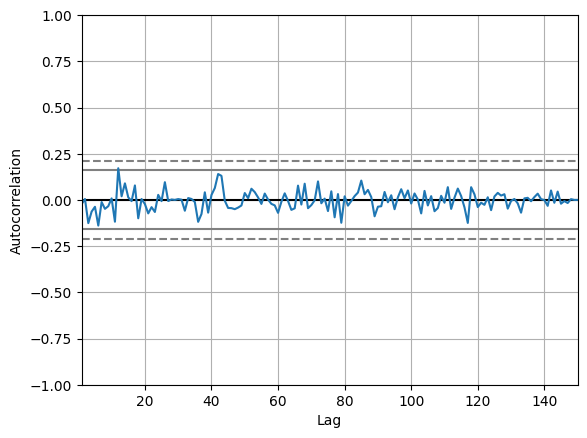

In [ ]:
pd.plotting.autocorrelation_plot(df['online_ads ($)'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

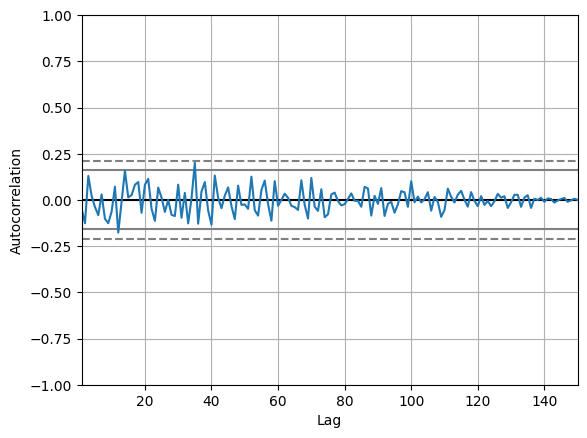

In [ ]:
pd.plotting.autocorrelation_plot(df['Print_ads ($)'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

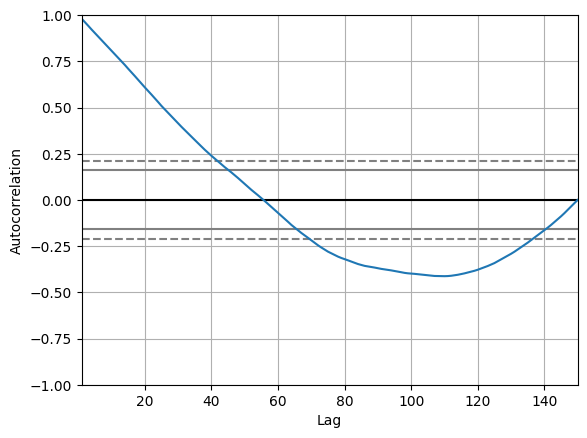

In [ ]:
pd.plotting.autocorrelation_plot(df['Price ($)'])

<Axes: ylabel='Frequency'>

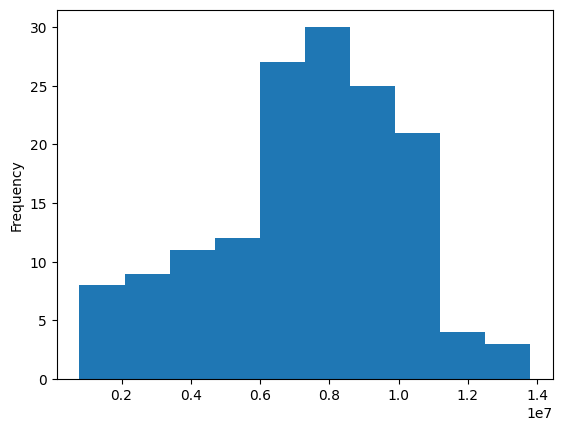

In [ ]:
df['Sales ($)'].plot.hist()

<Axes: ylabel='Frequency'>

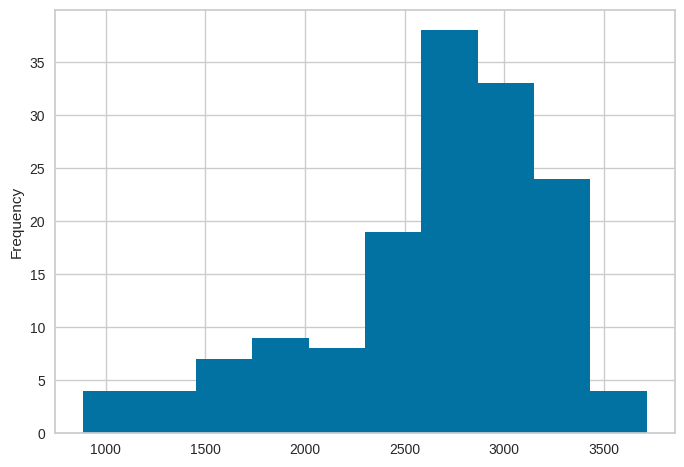

In [ ]:
np.sqrt(df['Sales ($)']).plot.hist()

<Axes: ylabel='Frequency'>

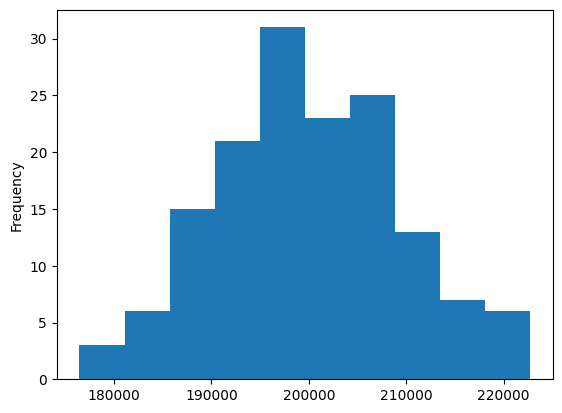

In [ ]:
df['TV_ads ($)'].plot.hist()

<Axes: ylabel='Frequency'>

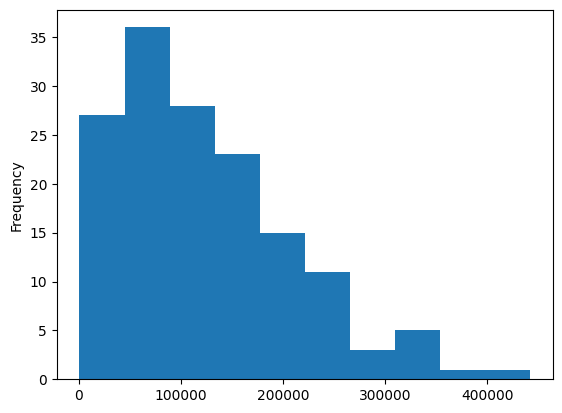

In [ ]:
df['online_ads ($)'].plot.hist()

<Axes: ylabel='Frequency'>

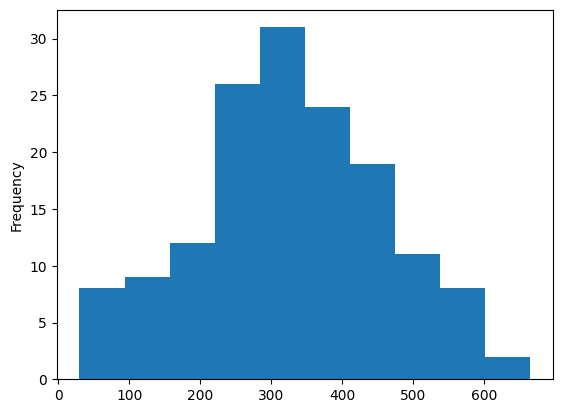

In [ ]:
np.sqrt(df['online_ads ($)']).plot.hist()

<Axes: ylabel='Frequency'>

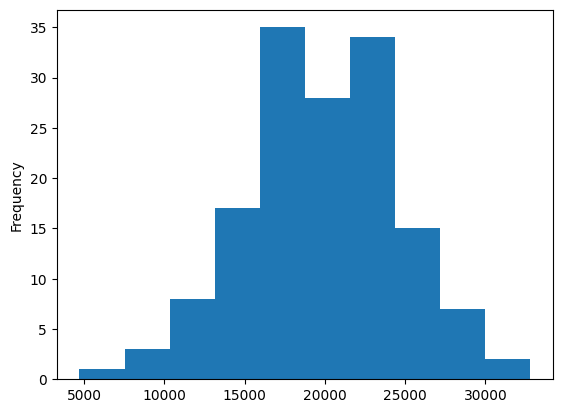

In [ ]:
df['Print_ads ($)'].plot.hist()

<Axes: ylabel='Frequency'>

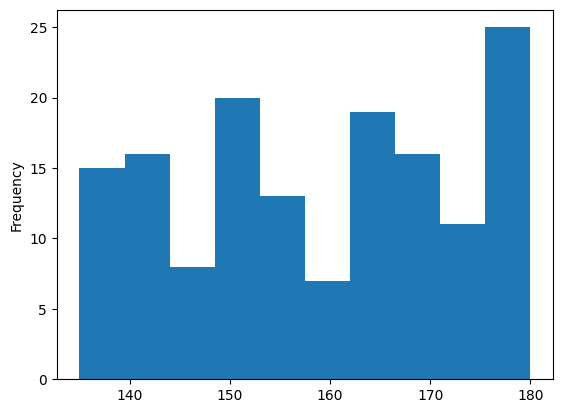

In [ ]:
df['Price ($)'].plot.hist()

<Axes: xlabel='Sales ($)', ylabel='Price ($)'>

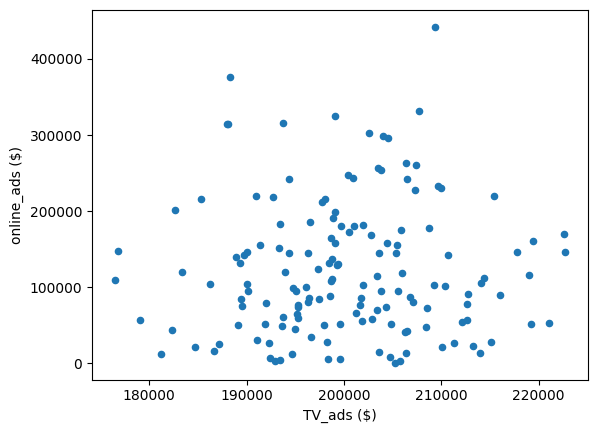

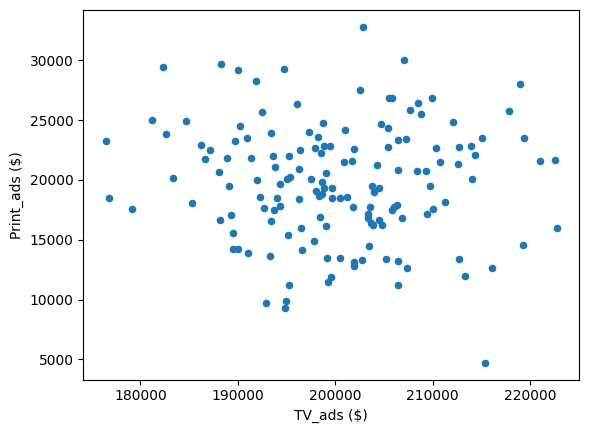

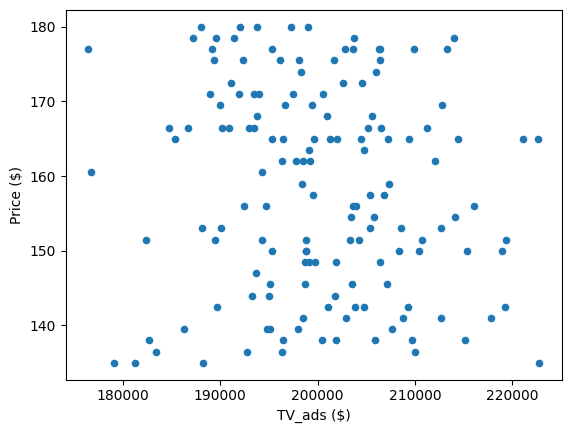

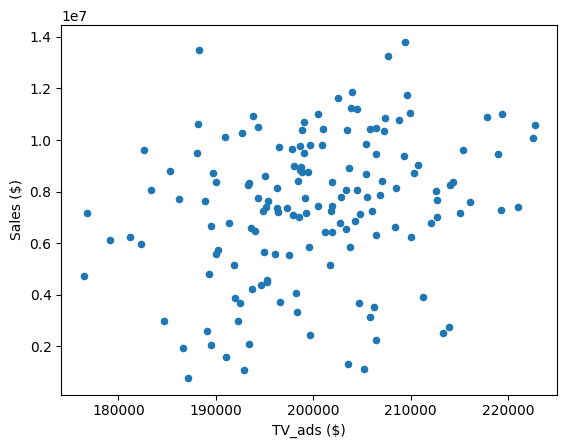

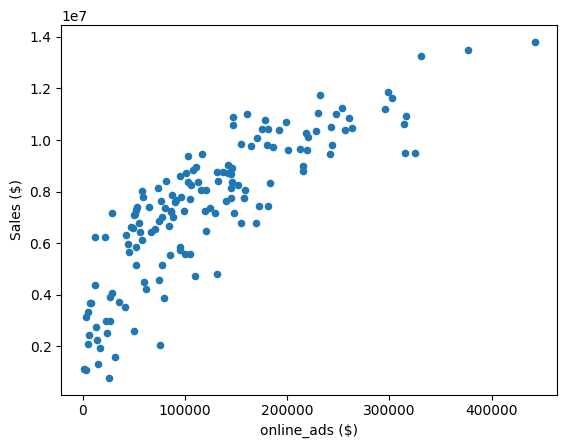

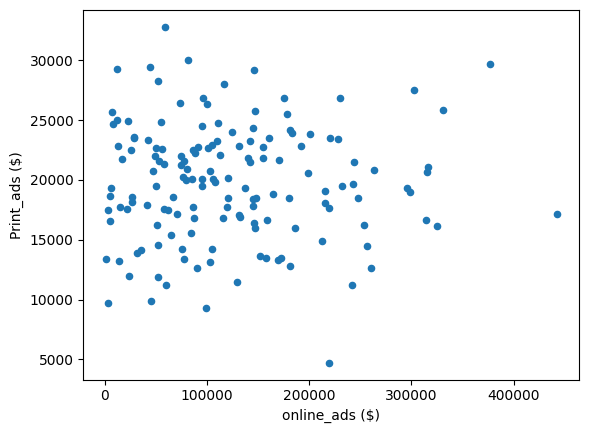

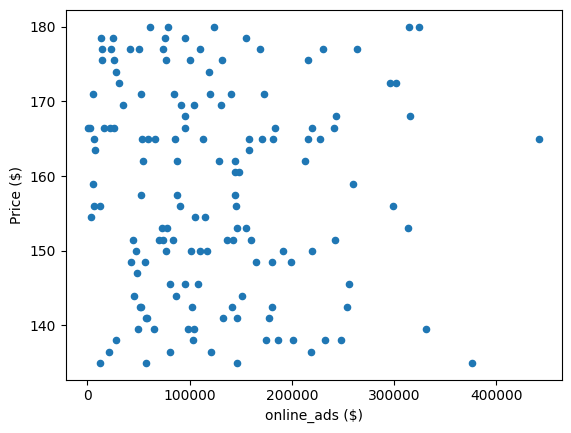

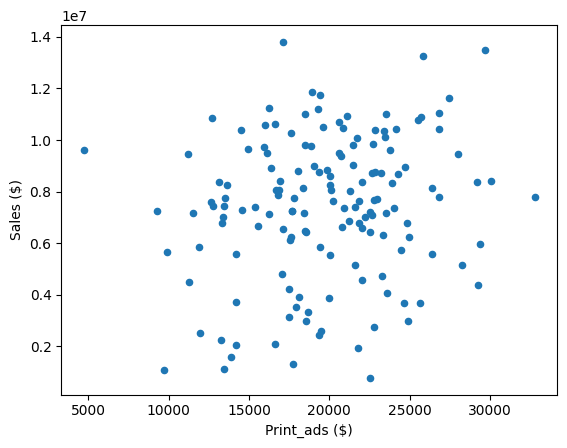

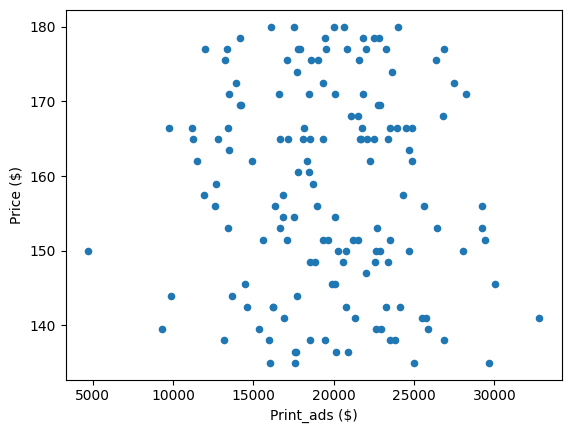

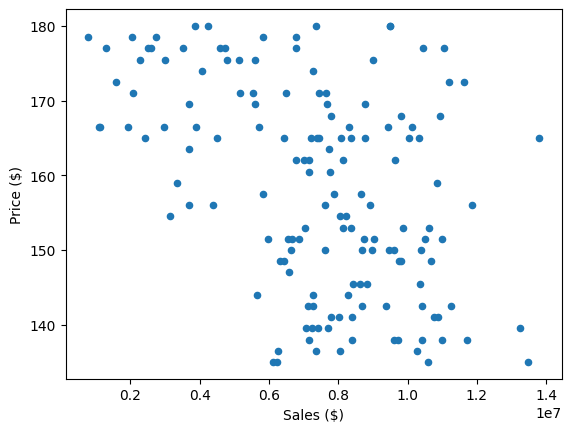

In [ ]:
numeric_col = ['Sales ($)', 'TV_ads ($)', 'online_ads ($)', 'Print_ads ($)', 'Price ($)']

df.plot.scatter(x='TV_ads ($)',y='online_ads ($)')
df.plot.scatter(x='TV_ads ($)',y='Print_ads ($)')
df.plot.scatter(x='TV_ads ($)',y='Price ($)')
df.plot.scatter(x='TV_ads ($)',y='Sales ($)')
df.plot.scatter(x='online_ads ($)',y='Sales ($)')
df.plot.scatter(x='online_ads ($)',y='Print_ads ($)')
df.plot.scatter(x='online_ads ($)',y='Price ($)')
df.plot.scatter(x='Print_ads ($)',y='Sales ($)')
df.plot.scatter(x='Print_ads ($)',y='Price ($)')
df.plot.scatter(x='Sales ($)',y='Price ($)')


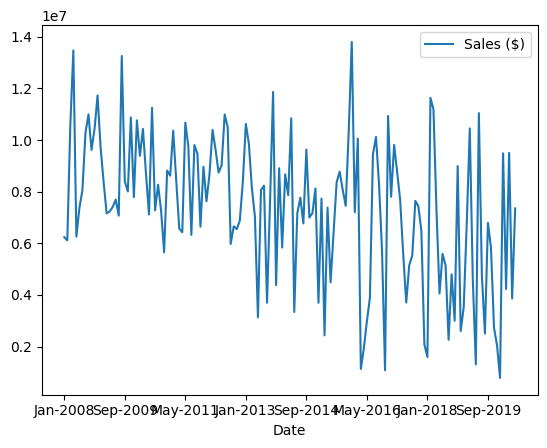

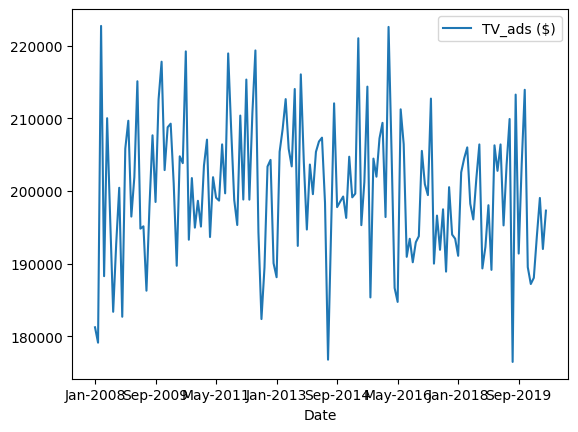

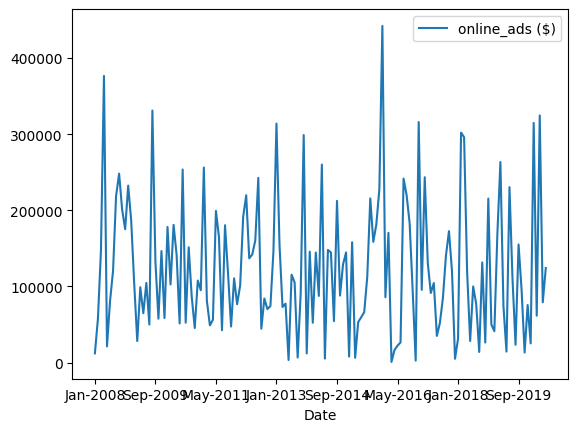

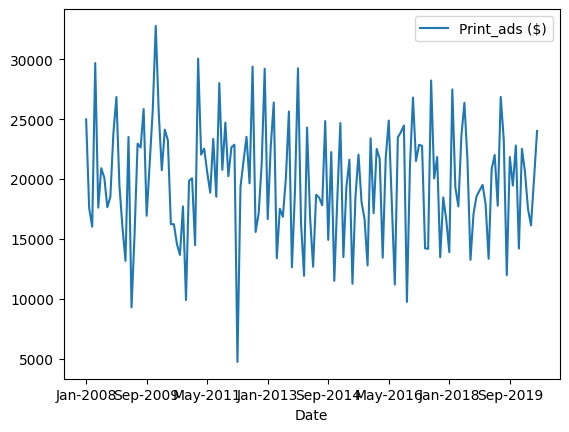

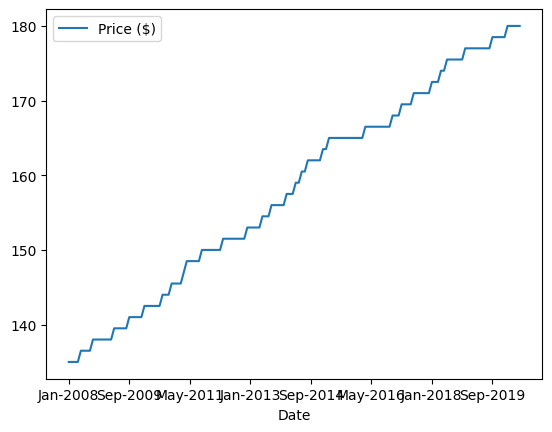

In [ ]:
numeric_col = ['Sales ($)', 'TV_ads ($)', 'online_ads ($)', 'Print_ads ($)', 'Price ($)']
for col in numeric_col:
  df.plot.line(x='Date',y=col)

# Baseline Model (Benchmark)

In [ ]:
from pycaret.regression import *
baseline_df = df.copy()
baseline_df = baseline_df.drop('Date',axis=1)

s = setup(baseline_df, target='Sales ($)', session_id = 123, fold = 5, train_size = 0.8)


,Description,Value
0,Session id,123
1,Target,Sales ($)
2,Target type,Regression
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(120, 5)"
6,Transformed test set shape,"(30, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,907249.5625,1066750253493.4688,1032836.0245,0.8997,0.2731,0.2273
1,743574.7812,739335485285.2631,859846.1986,0.8810,0.1190,0.0984
2,574481.7396,491363669031.1276,700973.3726,0.9297,0.1454,0.1092
3,665035.9271,762664695044.3359,873306.7588,0.9181,0.1848,0.1313
4,642070.6979,781633176090.7734,884100.2070,0.8942,0.3876,0.2995
Mean,706482.5417,768349455788.9938,870212.5123,0.9045,0.2220,0.1731
Std,113994.8684,182655274410.9583,105259.8651,0.0173,0.0979,0.0779


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,741001.6673,803889758750.4453,896598.9955,0.9244,0.2338,0.1778
1,815426.8241,1018784887084.8719,1009348.7440,0.8360,0.2264,0.1291
2,542294.4920,457209339605.8542,676172.5664,0.9346,0.1234,0.0938
3,708832.2160,827163938364.1322,909485.5350,0.9112,0.1814,0.1283
4,574390.6848,461295654407.1818,679187.4958,0.9375,0.2950,0.2175
Mean,676389.1768,713668715642.4971,834158.6673,0.9087,0.2120,0.1493
Std,102901.7677,220717219024.7788,133596.5319,0.0375,0.0572,0.0434


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Feature Engineering

In [ ]:
#relationship between online ads and sales
#df['sqrt_sales'] = np.sqrt(df['Sales ($)'])
df['sqrt_online_ads'] = np.sqrt(df['online_ads ($)'])
df['log_print'] = np.log(df['Print_ads ($)'])
df['log_tv'] = np.log(df['TV_ads ($)'])
#aggregate advertising spend
#df['total_advertising'] = df['TV_ads ($)'] + df['online_ads ($)'] + df['Print_ads ($)']

#transform dates
df['Date'] = pd.to_datetime(df['Date'])
#df['month'] = [i.month for i in df['Date']]
#df['year'] = [i.year for i in df['Date']]

#df['tv_online'] = df['TV_ads ($)']+df['online_ads ($)']
#df['tv_print'] = df['TV_ads ($)']+df['Print_ads ($)']
#df['print_online'] = df['Print_ads ($)']+df['online_ads ($)']

#df['TV_ads_delta'] = (df['TV_ads ($)'].diff(periods=1) / df['TV_ads ($)'].shift(1)) * 100
#df['online_ads_delta'] = (df['online_ads ($)'].diff(periods=1) / df['online_ads ($)'].shift(1)) * 100
#df['Print_ads_delta'] = (df['Print_ads ($)'].diff(periods=1) / df['Print_ads ($)'].shift(1)) * 100


#month over month percent changes in price and ad spent
df['price_change_bool'] = [0 if i == 0 or df['Price ($)'][i] == df['Price ($)'][i - 1] else 1 for i in range(len(df))]
#df['price_pct_change'] = (df['Price ($)']/df['Price ($)'].shift(1))-1
#df['tv_ads_pct_change'] = (df['TV_ads ($)']/df['TV_ads ($)'].shift(1))-1
#df['print_ads_pct_change'] = (df['Print_ads ($)']/df['Print_ads ($)'].shift(1))-1
#df['online_ads_pct_change'] = (df['online_ads ($)']/df['online_ads ($)'].shift(1))-1

#ratios
#df['tv_online_ratio'] = df['TV_ads ($)']/df['online_ads ($)']
#df['tv_print_ratio'] = df['TV_ads ($)']/df['Print_ads ($)']
#df['online_print_ratio'] = df['online_ads ($)']/df['Print_ads ($)']
#df['tv_total_ratio'] = df['TV_ads ($)']/df['total_advertising']
#df['print_total_ratio'] = df['Print_ads ($)']/df['total_advertising']
#df['online_total_ratio'] = df['online_ads ($)']/df['total_advertising']


df['tv_over_price'] = df['TV_ads ($)']/df['Price ($)']
df['print_over_price'] = df['Print_ads ($)']/df['Price ($)']
#df['online_ove_price'] = df['online_ads ($)']/df['Price ($)']
df['sqrt_online_over_price'] = np.sqrt(df['online_ads ($)'])/df['Price ($)']

df.head()

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price
0,2008-01-01,6237000,181222.548442,12152.540107,24986.912760,135.0,110.238560,10.126107,12.107481,0,1342.389248,185.088243,0.816582
1,2008-02-01,6115500,179104.353164,57353.376363,17574.385360,135.0,239.485650,9.774198,12.095724,0,1326.698912,130.180632,1.773968
2,2008-03-01,10577250,222756.223235,146794.245435,16016.022899,135.0,383.137371,9.681345,12.313833,0,1650.046098,118.637207,2.838055
3,2008-04-01,13473000,188266.818315,376459.468169,29689.694160,135.0,613.562929,10.298555,12.145615,0,1394.569025,219.923660,4.544911
4,2008-05-01,6258525,210038.289741,21297.573231,17606.991440,136.5,145.936881,9.776051,12.255045,1,1538.742049,128.988948,1.069135


In [ ]:
model_df = df.copy()
model_df = model_df.drop(['Date', 'online_ads ($)', 'Print_ads ($)','TV_ads ($)'], axis=1)
#model_df.drop(index=model_df.index[0], axis=0, inplace=True)

#model_df['month'] = model_df['month'].astype('category')
#model_df['year'] = model_df['year'].astype('category')
#model_df = pd.get_dummies(model_df, columns=['month','year'], drop_first=True)

model_df.head()

,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price
0,6237000,135.0,110.238560,10.126107,12.107481,0,1342.389248,185.088243,0.816582
1,6115500,135.0,239.485650,9.774198,12.095724,0,1326.698912,130.180632,1.773968
2,10577250,135.0,383.137371,9.681345,12.313833,0,1650.046098,118.637207,2.838055
3,13473000,135.0,613.562929,10.298555,12.145615,0,1394.569025,219.923660,4.544911
4,6258525,136.5,145.936881,9.776051,12.255045,1,1538.742049,128.988948,1.069135


# Parametric (Regression) Models

In [ ]:
from pycaret.regression import *
#s = setup(model_df, target='sqrt_sales', session_id = 123, fold = 5, train_size = 0.8)
s = setup(model_df, target='Sales ($)', session_id = 123, fold = 5, train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,Sales ($)
2,Target type,Regression
3,Original data shape,"(150, 9)"
4,Transformed data shape,"(150, 9)"
5,Transformed train set shape,"(120, 9)"
6,Transformed test set shape,"(30, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(include=['llar','lr','lasso','lar','ridge','br','en'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,406904.4500,271063249084.5834,511226.9134,0.9670,0.1767,0.0916,0.0460
lasso,Lasso Regression,406944.7167,271059278507.5166,511191.5611,0.9670,0.1767,0.0916,0.0460
llar,Lasso Least Angle Regression,407326.8500,271555373365.1166,511735.5790,0.9669,0.1767,0.0917,0.0540
lar,Least Angle Regression,404160.8833,270026074685.6500,511667.7509,0.9669,0.1840,0.0896,0.0260
ridge,Ridge Regression,504205.9417,390138642534.9584,612478.2900,0.9532,0.1745,0.1164,0.0300
br,Bayesian Ridge,531979.2167,443495345461.3000,651741.4817,0.9471,0.1721,0.1216,0.0440
en,Elastic Net,534301.3583,446761963099.1416,654214.3894,0.9467,0.1739,0.1226,0.0300


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,530237.2083,474980671264.6250,689188.4149,0.9553,0.2264,0.1364
1,399179.2083,262676129229.6250,512519.3940,0.9577,0.1077,0.0632
2,294451.8333,150903761513.5834,388463.3336,0.9784,0.0736,0.0497
3,415521.1250,243346819166.9584,493301.9554,0.9739,0.1212,0.0817
4,395132.8750,223408864248.1250,472661.4690,0.9698,0.3543,0.1270
Mean,406904.4500,271063249084.5834,511226.9134,0.9670,0.1767,0.0916
Std,75005.4087,108747507725.7957,98540.8146,0.0090,0.1024,0.0344


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
print(f'Intercept of linear model: {lr.intercept_}')
for f, c in zip (lr.feature_names_in_,lr.coef_):
      print(f'Coefficient of {f}: {c}')

Intercept of linear model: -358997792.0
Coefficient of Price ($): -248274.34375
Coefficient of sqrt_online_ads: 37492.6015625
Coefficient of log_print: 1126372.75
Coefficient of log_tv: 33599788.0
Coefficient of price_change_bool: 7981.60693359375
Coefficient of tv_over_price: -17077.20703125
Coefficient of print_over_price: 4238.71484375
Coefficient of sqrt_online_over_price: -3129341.75


# ML Model & Hyper Parameter Tuning

In [ ]:
df = pd.read_excel('MMM_Blender_data_2.xlsx', )
ml_model_df = df.copy()
ml_model_df.head()

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
0,Jan-2008,6237000,181222.548442,12152.540107,24986.912760,135.0
1,Feb-2008,6115500,179104.353164,57353.376363,17574.385360,135.0
2,Mar-2008,10577250,222756.223235,146794.245435,16016.022899,135.0
3,Apr-2008,13473000,188266.818315,376459.468169,29689.694160,135.0
4,May-2008,6258525,210038.289741,21297.573231,17606.991440,136.5


In [ ]:
#relationship between online ads and sales
#ml_model_df['sqrt_sales'] = np.sqrt(ml_model_df['Sales ($)'])
ml_model_df['sqrt_online_ads'] = np.sqrt(ml_model_df['online_ads ($)'])

#aggregate advertising spend
ml_model_df['total_advertising'] = ml_model_df['TV_ads ($)'] + ml_model_df['online_ads ($)'] + ml_model_df['Print_ads ($)']
ml_model_df['tv_print'] = ml_model_df['TV_ads ($)']+ml_model_df['Print_ads ($)']
#ratios
ml_model_df['tv_print_ratio'] = ml_model_df['TV_ads ($)']/ml_model_df['Print_ads ($)']
ml_model_df['print_total_ratio'] = ml_model_df['Print_ads ($)']/(ml_model_df['TV_ads ($)']+ml_model_df['online_ads ($)']+ml_model_df['Print_ads ($)']) #0.1108

ml_model_df = ml_model_df.drop(['Date', 'online_ads ($)'], axis=1)

ml_model_df.head()

,Sales ($),TV_ads ($),Print_ads ($),Price ($),sqrt_online_ads,total_advertising,tv_print,tv_print_ratio,print_total_ratio
0,6237000,181222.548442,24986.912760,135.0,110.238560,218362.001308,206209.461202,7.252699,0.114429
1,6115500,179104.353164,17574.385360,135.0,239.485650,254032.114887,196678.738524,10.191216,0.069182
2,10577250,222756.223235,16016.022899,135.0,383.137371,385566.491569,238772.246134,13.908336,0.041539
3,13473000,188266.818315,29689.694160,135.0,613.562929,594415.980643,217956.512474,6.341150,0.049948
4,6258525,210038.289741,17606.991440,136.5,145.936881,248942.854412,227645.281181,11.929255,0.070727


In [ ]:
from pycaret.regression import *
#s = setup(ml_model_df, target='sqrt_sales', session_id = 0, fold = 5, train_size = 0.8)
s = setup(ml_model_df, target='Sales ($)', session_id = 0, fold = 5, train_size = 0.8)

,Description,Value
0,Session id,0
1,Target,Sales ($)
2,Target type,Regression
3,Original data shape,"(150, 9)"
4,Transformed data shape,"(150, 9)"
5,Transformed train set shape,"(120, 9)"
6,Transformed test set shape,"(30, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(include=['et','rf','gbr','xgboost','lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,515506.3643,406838096726.9156,631371.0701,0.9462,0.1655,0.1108,0.0820
et,Extra Trees Regressor,576174.2562,550363707155.1891,734860.8434,0.9251,0.2234,0.1452,0.1500
xgboost,Extreme Gradient Boosting,625104.0823,632062779245.4275,793004.4630,0.9136,0.2061,0.1361,0.0940
rf,Random Forest Regressor,689919.1875,806617632553.7812,879179.6941,0.8927,0.2272,0.1585,0.1920
lightgbm,Light Gradient Boosting Machine,772895.3381,978420616110.3708,970147.5853,0.8745,0.2502,0.1793,0.0580


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,435742.5589,266299426196.9216,516042.0779,0.9715,0.2136,0.1198
1,623136.5280,597430517920.1211,772936.2962,0.9373,0.2141,0.1495
2,530766.7514,405357167455.1779,636676.6585,0.9402,0.1359,0.1039
3,512750.2748,456301823108.6701,675501.1644,0.9344,0.1199,0.0810
4,475135.7084,308801548953.6878,555699.1533,0.9475,0.1439,0.0998
Mean,515506.3643,406838096726.9156,631371.0701,0.9462,0.1655,0.1108
Std,62955.1938,116736118668.5559,90601.7032,0.0134,0.0402,0.0230


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
custom_params_gbr = {
  "loss":['absolute_error'],
  "n_estimators": [1000,5000],
  "learning_rate": [0.01, 0.05, 0.1, 0.5],
  "max_depth": [None, 3, 5, 10],
  "min_samples_split": [2,5,10],
}

tuned_model_gbr = tune_model(gbr, custom_grid=custom_params_gbr, n_iter=150, optimize='MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,524441.5720,458577899200.3491,677183.8002,0.9510,0.2476,0.1543
1,597567.1252,651007259173.4326,806850.2086,0.9317,0.2123,0.1428
2,565241.9393,457830294347.7319,676631.5795,0.9325,0.1422,0.1093
3,508632.1441,420716572891.5511,648626.6822,0.9395,0.1460,0.0944
4,473258.2364,364003301323.0375,603326.8611,0.9382,0.1573,0.1049
Mean,533828.2034,470427065387.2204,682523.8263,0.9386,0.1811,0.1211
Std,43453.7550,96649302521.6036,67736.9315,0.0069,0.0417,0.0232


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 96 candidates, totalling 480 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


'\ncustom_params_et = {\n  "n_estimators":[10, 50, 100, 150],\n  "max_depth": [None, 4, 5, 6],\n  "min_samples_split": [2, 5, 7],\n}\n\ntuned_model_et = tune_model(et, custom_grid=custom_params_et, n_iter=150, optimize=\'MAPE\')\n\ncustom_params_xgboost = {\n  "n_estimators": [100,500,1000],\n  "max_depth": [None, 3, 5, 7],\n  "min_samples_split": [2, 5, 7],\n  "learning_rate": [0.01, 0.05, 0.1, 0.5],\n}\n\ntuned_model_xgboost = tune_model(xgboost, custom_grid=custom_params_xgboost, n_iter=150, optimize=\'MAPE\')\n'

In [ ]:
evaluate_model(tuned_model_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Empirical Elasticity Simulation

In [ ]:
elasticity_df = model_df.copy()
elasticity_df.head()

,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price
0,6237000,135.0,110.238560,10.126107,12.107481,0,1342.389248,185.088243,0.816582
1,6115500,135.0,239.485650,9.774198,12.095724,0,1326.698912,130.180632,1.773968
2,10577250,135.0,383.137371,9.681345,12.313833,0,1650.046098,118.637207,2.838055
3,13473000,135.0,613.562929,10.298555,12.145615,0,1394.569025,219.923660,4.544911
4,6258525,136.5,145.936881,9.776051,12.255045,1,1538.742049,128.988948,1.069135


In [ ]:
X=elasticity_df.drop(['Sales ($)'], axis=1)
elasticity_df['s0'] = lr.predict(X)
elasticity_df

,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price,s0
0,6237000,135.0,110.238560,10.126107,12.107481,0,1342.389248,185.088243,0.816582,5.137785e+06
1,6115500,135.0,239.485650,9.774198,12.095724,0,1326.698912,130.180632,1.773968,6.231395e+06
2,10577250,135.0,383.137371,9.681345,12.313833,0,1650.046098,118.637207,2.838055,9.940427e+06
3,13473000,135.0,613.562929,10.298555,12.145615,0,1394.569025,219.923660,4.544911,1.307363e+07
4,6258525,136.5,145.936881,9.776051,12.255045,1,1538.742049,128.988948,1.069135,6.294334e+06
...,...,...,...,...,...,...,...,...,...,...
145,9486000,180.0,561.015988,9.934689,12.144402,1,1044.658679,114.632584,3.116755,9.486913e+06
146,4230000,180.0,248.159468,9.770771,12.174319,0,1076.383184,97.301436,1.378664,3.393530e+06
147,9504000,180.0,569.703907,9.687979,12.201302,0,1105.823466,89.570176,3.165022,1.013681e+07
148,3861000,180.0,281.371362,9.903152,12.165319,0,1066.739179,111.073865,1.563174,4.131116e+06


In [ ]:
#Price
metric='price'
price_elasticity_df = elasticity_df.copy()
price_elasticity_df['Price ($)'] = price_elasticity_df['Price ($)'] * 1.01

X=price_elasticity_df.drop(['Sales ($)', 's0'], axis=1)
price_elasticity_df['s1'] = lr.predict(X)
price_elasticity_df['price_elasticity'] = ((price_elasticity_df['s1']/price_elasticity_df['s0'])-1)*100

mean_elasticity = np.mean(price_elasticity_df['price_elasticity'])
print(f'A 1% change in {metric} results in a average {round(mean_elasticity,2)}% change in sales')

price_elasticity_df.head()

A 1% change in price results in a average -7.7% change in sales


,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price,s0,s1,price_elasticity
0,6237000,136.350,110.238560,10.126107,12.107481,0,1342.389248,185.088243,0.816582,5.137785e+06,4.802615e+06,-6.523635
1,6115500,136.350,239.485650,9.774198,12.095724,0,1326.698912,130.180632,1.773968,6.231395e+06,5.896225e+06,-5.378737
2,10577250,136.350,383.137371,9.681345,12.313833,0,1650.046098,118.637207,2.838055,9.940427e+06,9.605257e+06,-3.371790
3,13473000,136.350,613.562929,10.298555,12.145615,0,1394.569025,219.923660,4.544911,1.307363e+07,1.273846e+07,-2.563713
4,6258525,137.865,145.936881,9.776051,12.255045,1,1538.742049,128.988948,1.069135,6.294334e+06,5.955440e+06,-5.384120


In [ ]:
#Square Root Online Ads
#Price
metric='Square Root Online Ads'
sqrt_online_elasticity_df = elasticity_df.copy()
sqrt_online_elasticity_df['sqrt_online_ads'] = sqrt_online_elasticity_df['sqrt_online_ads'] * 1.01

X=sqrt_online_elasticity_df.drop(['Sales ($)', 's0'], axis=1)
sqrt_online_elasticity_df['s1'] = lr.predict(X)
sqrt_online_elasticity_df['sqrt_online_elasticity'] = ((sqrt_online_elasticity_df['s1']/sqrt_online_elasticity_df['s0'])-1)*100

mean_elasticity = np.mean(sqrt_online_elasticity_df['sqrt_online_elasticity'])
print(f'A 1% change in {metric} results in a average {round(mean_elasticity,2)}% change in sales')

price_elasticity_df.head()

A 1% change in Square Root Online Ads results in a average 1.72% change in sales


,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price,s0,s1,price_elasticity
0,6237000,136.350,110.238560,10.126107,12.107481,0,1342.389248,185.088243,0.816582,5.137785e+06,4.802615e+06,-6.523635
1,6115500,136.350,239.485650,9.774198,12.095724,0,1326.698912,130.180632,1.773968,6.231395e+06,5.896225e+06,-5.378737
2,10577250,136.350,383.137371,9.681345,12.313833,0,1650.046098,118.637207,2.838055,9.940427e+06,9.605257e+06,-3.371790
3,13473000,136.350,613.562929,10.298555,12.145615,0,1394.569025,219.923660,4.544911,1.307363e+07,1.273846e+07,-2.563713
4,6258525,137.865,145.936881,9.776051,12.255045,1,1538.742049,128.988948,1.069135,6.294334e+06,5.955440e+06,-5.384120


In [ ]:
#Ln Print Ads
#Price
metric='ln(print ads)'
price_elasticity_df = elasticity_df.copy()
price_elasticity_df['log_print'] = price_elasticity_df['log_print'] * 1.01

X=price_elasticity_df.drop(['Sales ($)', 's0'], axis=1)
price_elasticity_df['s1'] = lr.predict(X)
price_elasticity_df['price_elasticity'] = ((price_elasticity_df['s1']/price_elasticity_df['s0'])-1)*100

mean_elasticity = np.mean(price_elasticity_df['price_elasticity'])
print(f'A 1% change in {metric} results in a average {round(mean_elasticity,2)}% change in sales')

price_elasticity_df.head()

A 1% change in ln(print ads) results in a average 2.1% change in sales


,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price,s0,s1,price_elasticity
0,6237000,135.0,110.238560,10.227369,12.107481,0,1342.389248,185.088243,0.816582,5.137785e+06,5.251843e+06,2.219978
1,6115500,135.0,239.485650,9.871940,12.095724,0,1326.698912,130.180632,1.773968,6.231395e+06,6.341489e+06,1.766762
2,10577250,135.0,383.137371,9.778158,12.313833,0,1650.046098,118.637207,2.838055,9.940427e+06,1.004948e+07,1.097016
3,13473000,135.0,613.562929,10.401541,12.145615,0,1394.569025,219.923660,4.544911,1.307363e+07,1.318963e+07,0.887283
4,6258525,136.5,145.936881,9.873812,12.255045,1,1538.742049,128.988948,1.069135,6.294334e+06,6.404449e+06,1.749427


In [ ]:
#Ln TV Ads
#Price
metric='ln(TV ads)'
price_elasticity_df = elasticity_df.copy()
price_elasticity_df['log_tv'] = price_elasticity_df['log_tv'] * 1.01

X=price_elasticity_df.drop(['Sales ($)', 's0'], axis=1)
price_elasticity_df['s1'] = lr.predict(X)
price_elasticity_df['price_elasticity'] = ((price_elasticity_df['s1']/price_elasticity_df['s0'])-1)*100

mean_elasticity = np.mean(price_elasticity_df['price_elasticity'])
print(f'A 1% change in {metric} results in a average {round(mean_elasticity,2)}% change in sales')

price_elasticity_df.head()

A 1% change in ln(TV ads) results in a average 78.16% change in sales


,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price,s0,s1,price_elasticity
0,6237000,135.0,110.238560,10.126107,12.228556,0,1342.389248,185.088243,0.816582,5.137785e+06,9.205873e+06,79.179800
1,6115500,135.0,239.485650,9.774198,12.216681,0,1326.698912,130.180632,1.773968,6.231395e+06,1.029553e+07,65.220346
2,10577250,135.0,383.137371,9.681345,12.436972,0,1650.046098,118.637207,2.838055,9.940427e+06,1.407785e+07,41.622175
3,13473000,135.0,613.562929,10.298555,12.267072,0,1394.569025,219.923660,4.544911,1.307363e+07,1.715453e+07,31.214749
4,6258525,136.5,145.936881,9.776051,12.377596,1,1538.742049,128.988948,1.069135,6.294334e+06,1.041200e+07,65.418663


In [ ]:
#TV Ads over Price
#Price
metric='TV ads/Price'
price_elasticity_df = elasticity_df.copy()
price_elasticity_df['tv_over_price'] = price_elasticity_df['tv_over_price'] * 1.01

X=price_elasticity_df.drop(['Sales ($)', 's0'], axis=1)
price_elasticity_df['s1'] = lr.predict(X)
price_elasticity_df['price_elasticity'] = ((price_elasticity_df['s1']/price_elasticity_df['s0'])-1)*100

mean_elasticity = np.mean(price_elasticity_df['price_elasticity'])
print(f'A 1% change in {metric} results in a average {round(mean_elasticity,2)}% change in sales')

price_elasticity_df.head()

A 1% change in TV ads/Price results in a average -4.0% change in sales


,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price,s0,s1,price_elasticity
0,6237000,135.0,110.238560,10.126107,12.107481,0,1355.813140,185.088243,0.816582,5.137785e+06,4.908543e+06,-4.461895
1,6115500,135.0,239.485650,9.774198,12.095724,0,1339.965901,130.180632,1.773968,6.231395e+06,6.004832e+06,-3.635833
2,10577250,135.0,383.137371,9.681345,12.313833,0,1666.546559,118.637207,2.838055,9.940427e+06,9.658645e+06,-2.834705
3,13473000,135.0,613.562929,10.298555,12.145615,0,1408.514715,219.923660,4.544911,1.307363e+07,1.283548e+07,-1.821632
4,6258525,136.5,145.936881,9.776051,12.255045,1,1554.129470,128.988948,1.069135,6.294334e+06,6.031560e+06,-4.174773


In [ ]:
#Print over Price
#Price
metric='Print/Price'
price_elasticity_df = elasticity_df.copy()
price_elasticity_df['print_over_price'] = price_elasticity_df['print_over_price'] * 1.01

X=price_elasticity_df.drop(['Sales ($)', 's0'], axis=1)
price_elasticity_df['s1'] = lr.predict(X)
price_elasticity_df['price_elasticity'] = ((price_elasticity_df['s1']/price_elasticity_df['s0'])-1)*100

mean_elasticity = np.mean(price_elasticity_df['price_elasticity'])
print(f'A 1% change in {metric} results in a average {round(mean_elasticity,2)}% change in sales')

price_elasticity_df.head()

A 1% change in Print/Price results in a average 0.09% change in sales


,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price,s0,s1,price_elasticity
0,6237000,135.0,110.238560,10.126107,12.107481,0,1342.389248,186.939125,0.816582,5.137785e+06,5.145630e+06,0.152699
1,6115500,135.0,239.485650,9.774198,12.095724,0,1326.698912,131.482439,1.773968,6.231395e+06,6.236913e+06,0.088551
2,10577250,135.0,383.137371,9.681345,12.313833,0,1650.046098,119.823579,2.838055,9.940427e+06,9.945456e+06,0.050588
3,13473000,135.0,613.562929,10.298555,12.145615,0,1394.569025,222.122897,4.544911,1.307363e+07,1.308295e+07,0.071303
4,6258525,136.5,145.936881,9.776051,12.255045,1,1538.742049,130.278838,1.069135,6.294334e+06,6.299802e+06,0.086863


In [ ]:
#Square Root Online over Price
#Price
metric='Square Root Online/Price'
price_elasticity_df = elasticity_df.copy()
price_elasticity_df['sqrt_online_over_price'] = price_elasticity_df['sqrt_online_over_price'] * 1.01

X=price_elasticity_df.drop(['Sales ($)', 's0'], axis=1)
price_elasticity_df['s1'] = lr.predict(X)
price_elasticity_df['price_elasticity'] = ((price_elasticity_df['s1']/price_elasticity_df['s0'])-1)*100

mean_elasticity = np.mean(price_elasticity_df['price_elasticity'])
print(f'A 1% change in {metric} results in a average {round(mean_elasticity,2)}% change in sales')

price_elasticity_df.head()

A 1% change in Square Root Online/Price results in a average -0.9% change in sales


,Sales ($),Price ($),sqrt_online_ads,log_print,log_tv,price_change_bool,tv_over_price,print_over_price,sqrt_online_over_price,s0,s1,price_elasticity
0,6237000,135.0,110.238560,10.126107,12.107481,0,1342.389248,185.088243,0.824748,5.137785e+06,5.112231e+06,-0.497367
1,6115500,135.0,239.485650,9.774198,12.095724,0,1326.698912,130.180632,1.791707,6.231395e+06,6.175882e+06,-0.890868
2,10577250,135.0,383.137371,9.681345,12.313833,0,1650.046098,118.637207,2.866435,9.940427e+06,9.851615e+06,-0.893447
3,13473000,135.0,613.562929,10.298555,12.145615,0,1394.569025,219.923660,4.590360,1.307363e+07,1.293140e+07,-1.087883
4,6258525,136.5,145.936881,9.776051,12.255045,1,1538.742049,128.988948,1.079826,6.294334e+06,6.260877e+06,-0.531540
